## MOVIES RECOMENDATION SYSTEM PROJECT
#### GROUP 3
##### Group Members:
      Gideon Ochieng
      Lorna Wangui
      Ann Mwangi
      Charles Odhiambo
      Victor Masinde


### Project Overview
An international powerhouse, the film business brings in billions of dollars every year. According to Statista, the worldwide box office brought in an incredible $42.5 billion in 2019 alone. Film production, which include studios, independent producers, and streaming services, is the creative centre where motion pictures, television series, and other visual content are made. These works are marketed and delivered to theatres, streaming platforms, and other locations by the distribution division. The term "exhibition" describes the showing of films and television series in theatres. The allure of films is universal, bringing people from different origins together. Despite this widespread appeal, our individual film preferences are distinctive, ranging from romance to sci-fi to thrillers, and frequently focussing on our favourite actors and filmmakers.

### Business Understanding
#### Real-World Problem
In an era where streaming platforms dominate the entertainment landscape, users often face difficulty in selecting movies due to the overwhelming number of choices available. This leads to "choice paralysis," where the sheer volume of options prevents users from making satisfying decisions. A recommendation system can address this by providing personalized movie suggestions based on a user’s past ratings, making their movie-watching experience more enjoyable and efficient.

#### Stakeholders
Primary Stakeholders:

End Users: Individuals who need personalized recommendations to find movies they are likely to enjoy.
Streaming Platforms: Businesses looking to enhance user engagement and retention by offering tailored recommendations.

Secondary Stakeholders:

Movie Studios: Studios seeking insights into audience preferences to guide future productions.
Market Researchers: Analysts studying consumer behavior through movie preferences and trends.
Project Value
The project will solve the problem of overwhelming choice by providing users with a personalized top-5 list of movie recommendations. It will:

Enhance user satisfaction by reducing time spent searching for movies.
Improve user engagement for streaming platforms, leading to higher retention rates.
Help streaming platforms and studios understand user preferences, informing content strategies and acquisitions.
Business Goals
Create a recommendation system using collaborative filtering to predict user preferences.
Provide an easy-to-use interface where users can input ratings for movies they've watched.
Ensure the system addresses the "cold start" problem for new users by incorporating content-based techniques.

Conclusion

The recommendation system will make movie selection faster and more satisfying for users, while also providing business value to streaming platforms and studios by increasing engagement and understanding consumer preferences.

### Data Understanding

The project uses the **MovieLens dataset**, a widely used dataset from the **GroupLens research lab** at the University of Minnesota.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import SVD, KNNBasic, Reader, Dataset, accuracy
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
import joblib
from collections import Counter

In [2]:
# Load the datasets into DataFrames
movies_df = pd.read_csv('ml-latest-small/movies.csv')
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
link_df = pd.read_csv('ml-latest-small/links.csv')
tags_df = pd.read_csv('ml-latest-small/tags.csv')


#### Movies dataset

### Movies Dataset Overview

The dataset contains 9,742 entries and three columns:

1. movieId (int64): Unique identifiers for movies.
2. title (object): Movie titles.
3. genres (object): Genres associated with each movie.

All columns have 9,742 non-null values.

In [3]:
# Display a concise summary of the movies_df DataFrame
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
# Get the dimensions of the movies_df DataFrame
movies_df.shape

(9742, 3)

#### Ratings Dataset

### Ratings Dataset Overview

The ratings_df DataFrame contains *100,836 entries* with the following columns:

- *userId*: Unique identifier for users (int64)
- *movieId*: Unique identifier for movies (int64)
- *rating*: User's rating for the movie (float64)
- *timestamp*: Timestamp of the rating (int64)

In [5]:
# Display a concise summary of the ratings_df DataFrame
# Display the first 4 rows of the ratings_df DataFrame
ratings_df.info()
ratings_df.head(4)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815


In [6]:
# Get the dimensions of the ratings_df DataFrame
ratings_df.shape

(100836, 4)

#### Tags Dataset

### Tags Dataset Overview

The tags_df DataFrame contains *3,683 entries* with the following columns:

- *userId*: Unique identifier for users (int64)
- *movieId*: Unique identifier for movies (int64)
- *tag*: User-provided tag for the movie (object)
- *timestamp*: Timestamp of the tag (int64)

In [7]:
# Display a concise summary of the tags_df DataFrame
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [8]:
# Get the dimensions of the tags_df DataFrame
tags_df.shape

(3683, 4)

#### Links Dataset

### Links Dataset Overview

The link_df DataFrame contains *9,742 entries* with the following columns:

- *movieId*: Unique identifier for movies (int64)
- *imdbId*: Identifier for movies in the IMDb database (int64)
- *tmdbId*: Identifier for movies in the TMDb database (float64)

In [9]:
# Display a concise summary of the link_df DataFrame
link_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [10]:
# Get the dimensions of the link_df DataFrame
link_df.shape

(9742, 3)

## DATA CLEANING

- Merge datasets
- Check for missing values and imputing them
- Checking for duplicates
- Drop irrelevant columns


### Merging Movies and Ratings Datasets

The movies_df and ratings_df DataFrames are merged using the movieId column as the key. The merge operation is performed with an *inner join*, ensuring that only movies with corresponding ratings are included in the resulting DataFrame.

In [11]:
# Merge the movies_df with ratings_df on movieId
df=pd.merge(movies_df,ratings_df,on="movieId",how="inner")
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [12]:
# Basic information about the merged dataframes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [13]:
# Size of merged dataframe
df.shape

(100836, 6)

In [14]:
# checking the columns in the merged dataframe
df.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

In [15]:
# Merged dataset description
df.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


In [16]:
# checking for duplicates in the dataframe
df.duplicated().sum()

0

In [17]:
# checking for missing values
df.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [18]:
# Identify duplicated rows in the DataFrame 'df' based on the 'userId' and 'movieId' columns
duplicated_rows = df[df.duplicated(subset=['userId','movieId'])]
duplicated_rows

,movieId,title,genres,userId,rating,timestamp


### EDA

### Identifying Popular Movies

To determine the most popular movies, the title column in the merged DataFrame (df) is analyzed using the value_counts() method. This provides a count of how many times each movie appears in the dataset, effectively ranking movies based on the number of ratings they have received.

In [19]:
# popular movies
popular_movies = df['title'].value_counts()
popular_movies

Forrest Gump (1994)                    329
Shawshank Redemption, The (1994)       317
Pulp Fiction (1994)                    307
Silence of the Lambs, The (1991)       279
Matrix, The (1999)                     278
                                      ... 
McFarland, USA (2015)                    1
Mozart and the Whale (2005)              1
Slaughterhouse-Five (1972)               1
Two Women (Ciociara, La) (1960)          1
Ice Age: A Mammoth Christmas (2011)      1
Name: title, Length: 9719, dtype: int64

## Visualizing the Most Popular Movies

To understand the dataset better, we visualized the top 15 most popular movies based on the frequency of user interactions.

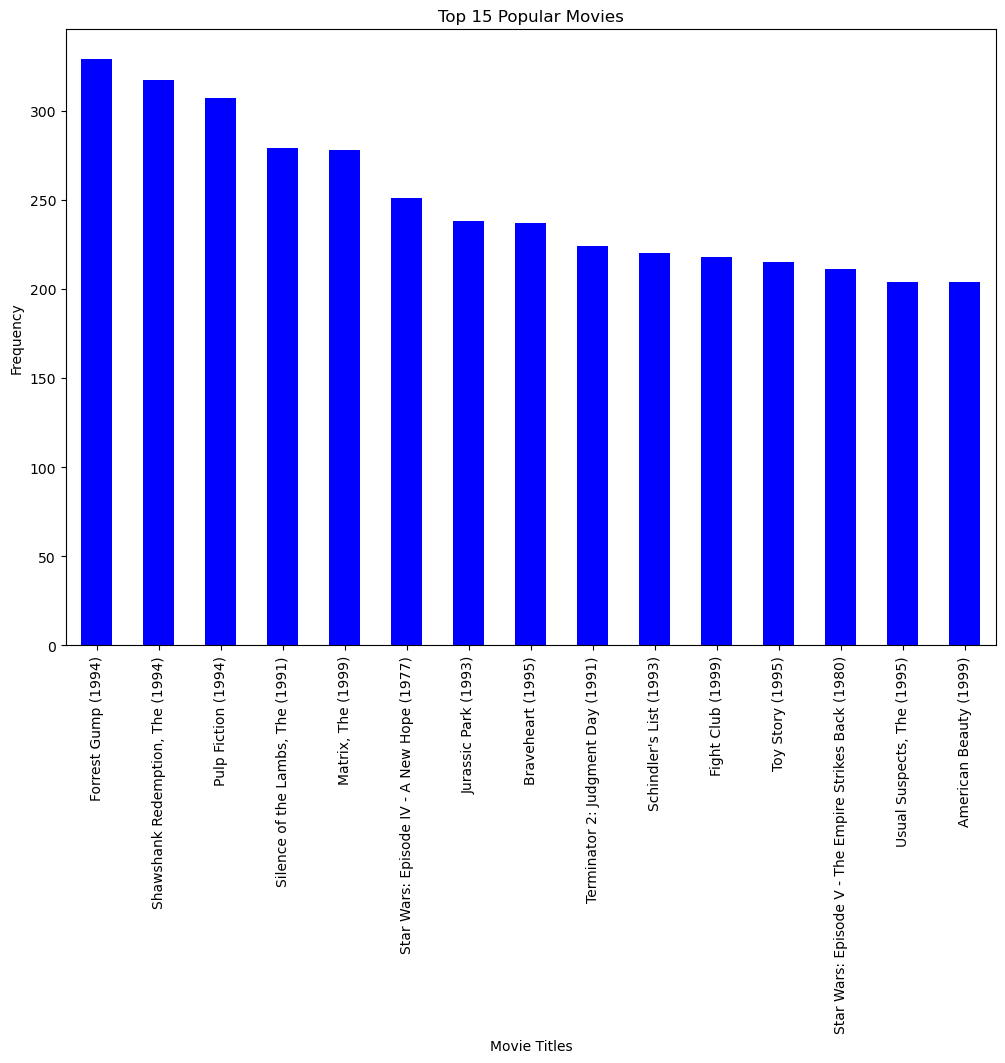

In [20]:
#plot for  most popular movies
plt.figure(figsize=(12,8))
df['title'].value_counts().head(15).plot(kind='bar',color ='blue')
plt.title('Top 15 Popular Movies')
plt.xlabel('Movie Titles')
plt.ylabel('Frequency')
plt.show()


## Visualizing the Most Popular Genres Combinations

To analyze user preferences across genres, we visualized the top 15 genres combinations based on their frequency in the dataset.


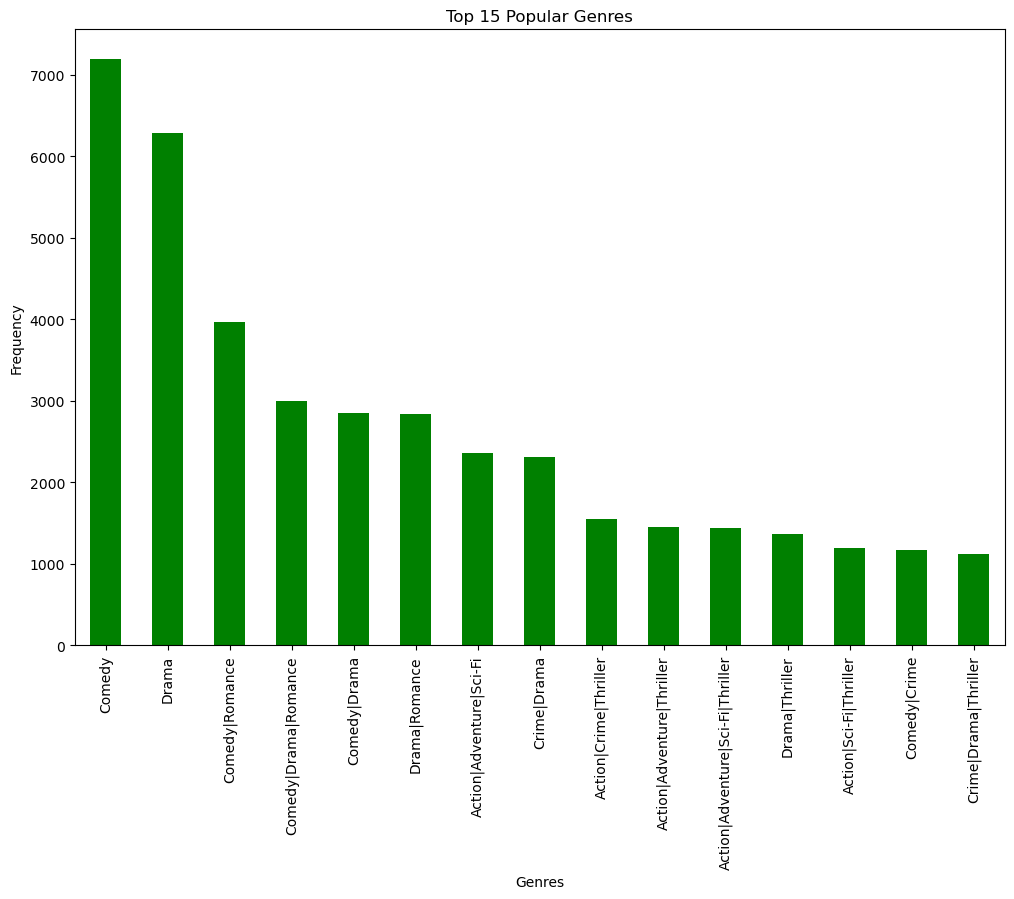

In [21]:
# plot for popular genres
plt.figure(figsize=(12,8))
df['genres'].value_counts().head(15).plot(kind='bar',color='green')
plt.title('Top 15 Popular Genres')
plt.ylabel('Frequency')
plt.xlabel('Genres')
plt.show()

## Analyzing Genre Frequency

To gain deeper insights into the diversity of genres, we computed the frequency of individual genres using the Counter class from Python’s collections module.

In [22]:
# Calculating the frequency of each genre in the 'genres' column of the DataFrame using counter function
genre_frequency = Counter(g for genres in df['genres'] for g in genres)

# Print the total number of unique genres found
print(f"There are {len(genre_frequency)} genres.")

# Display the frequency of each genre
genre_frequency

There are 35 genres.


Counter({'A': 65929,
         'd': 72469,
         'v': 24161,
         'e': 170734,
         'n': 111181,
         't': 84488,
         'u': 29518,
         'r': 183354,
         '|': 173644,
         'i': 137363,
         'm': 124863,
         'a': 142852,
         'o': 111518,
         'C': 64942,
         'h': 35660,
         'l': 67167,
         'y': 67454,
         'F': 29947,
         's': 25670,
         'R': 18124,
         'c': 71359,
         'D': 43147,
         'T': 26452,
         'H': 7291,
         'M': 15957,
         'S': 17243,
         '-': 18113,
         'W': 6789,
         'I': 4145,
         'X': 4145,
         'N': 870,
         '(': 47,
         ' ': 94,
         'g': 47,
         ')': 47})

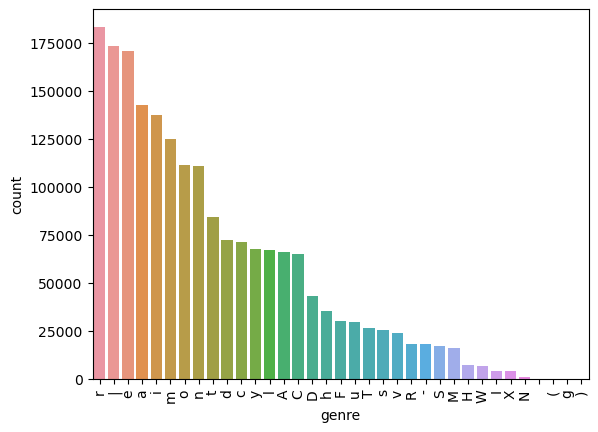

In [23]:
# Converting the genre frequency Counter object into a DataFrame
genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns = ['genre', 'count']

# Creating a bar plot to visualize the frequency of each genre
sns.barplot(x='genre', y='count', data=genre_frequency_df.sort_values(by='count', ascending=False))
plt.xticks(rotation=90)
plt.show()


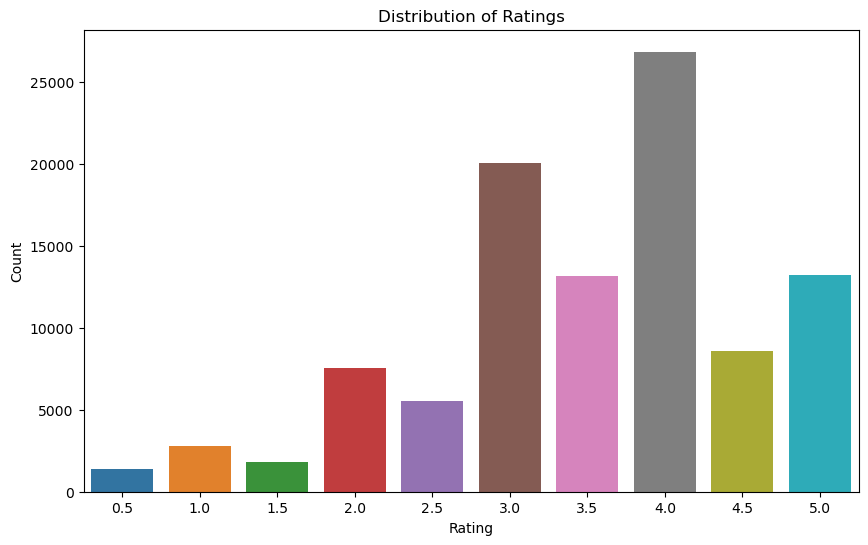

In [ ]:
# ploting for the distribution of ratings
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## Observed ratings per genre


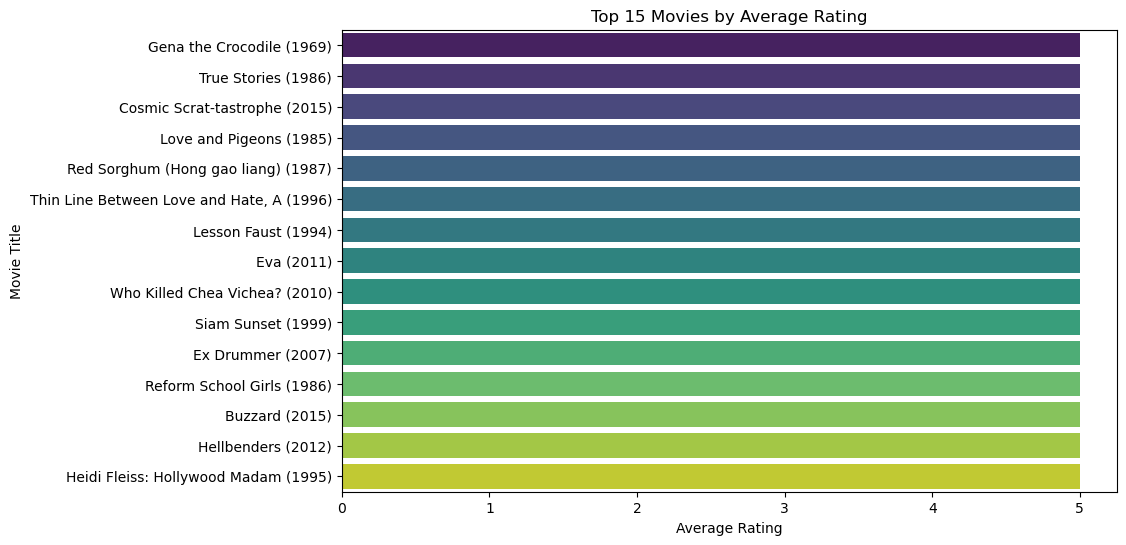

In [ ]:
# the average rating for each movie
average_ratings = df.groupby('title')['rating'].mean().reset_index()

average_ratings.columns = ['title', 'avg_rating']
average_ratings = average_ratings.sort_values(by='avg_rating', ascending=False)

# plotting a bar plot to visualize the top 10 movies by average rating
plt.figure(figsize=(10, 6))
sns.barplot(x="avg_rating", y="title", data=round(average_ratings.head(15), 2), palette="viridis")
plt.title("Top 15 Movies by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()

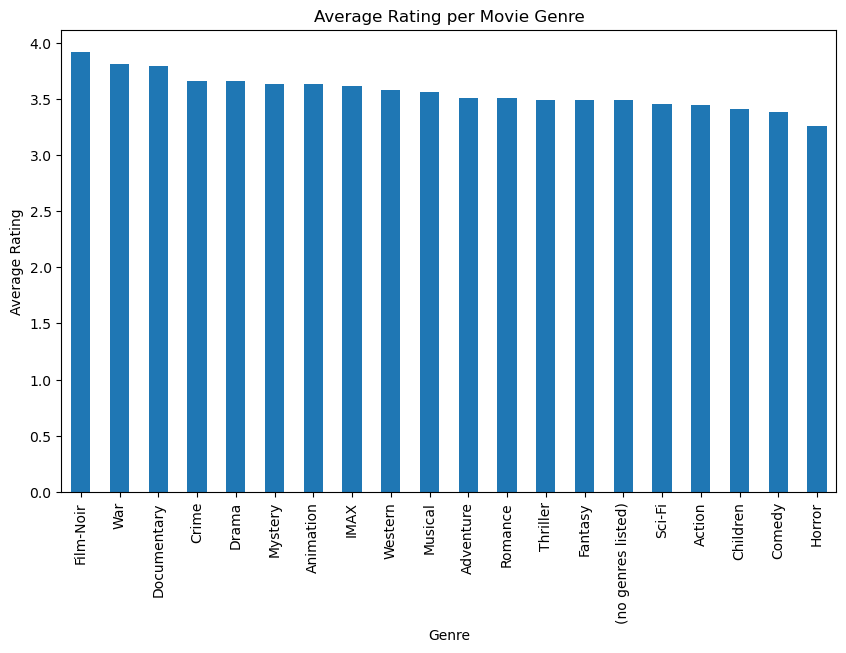

In [26]:
# Spliting the 'genres' column into lists of individual genres for each movie
df['genres'] = df['genres'].str.split('|')

df_exploded = df.explode('genres')

# Calculating the average rating for each genre
avg_rating_per_genre = df_exploded.groupby('genres')['rating'].mean().sort_values(ascending=False)

# Ploting the average rating per genre as a bar chart
plt.figure(figsize=(10, 6))
avg_rating_per_genre.plot(kind='bar')
plt.title('Average Rating per Movie Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()


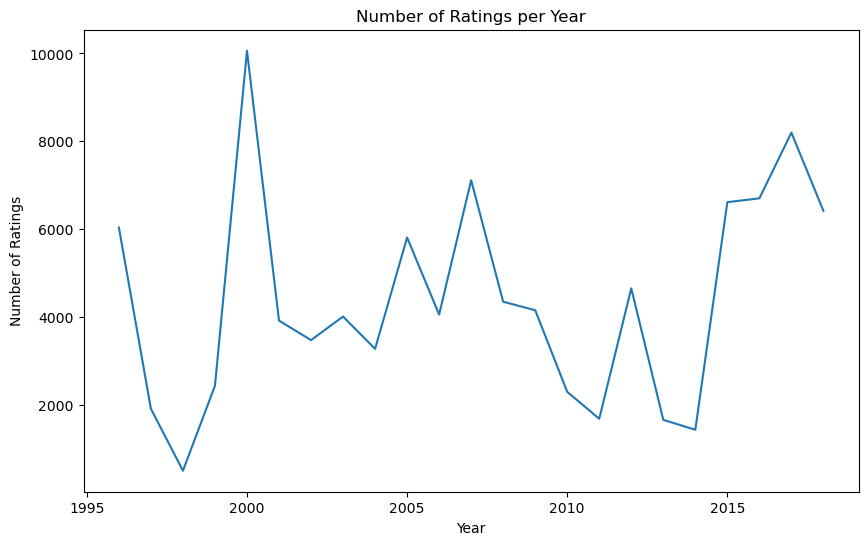

In [27]:
# Converting the 'timestamp' column to a datetime format and extract the year
df['year'] = pd.to_datetime(df['timestamp'], unit='s').dt.year

# Counting the number of ratings for each year
ratings_per_year = df.groupby('year').size()

# Plotting the number of ratings per year as a line chart
plt.figure(figsize=(10, 6))
ratings_per_year.plot(kind='line')
plt.title('Number of Ratings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.show()


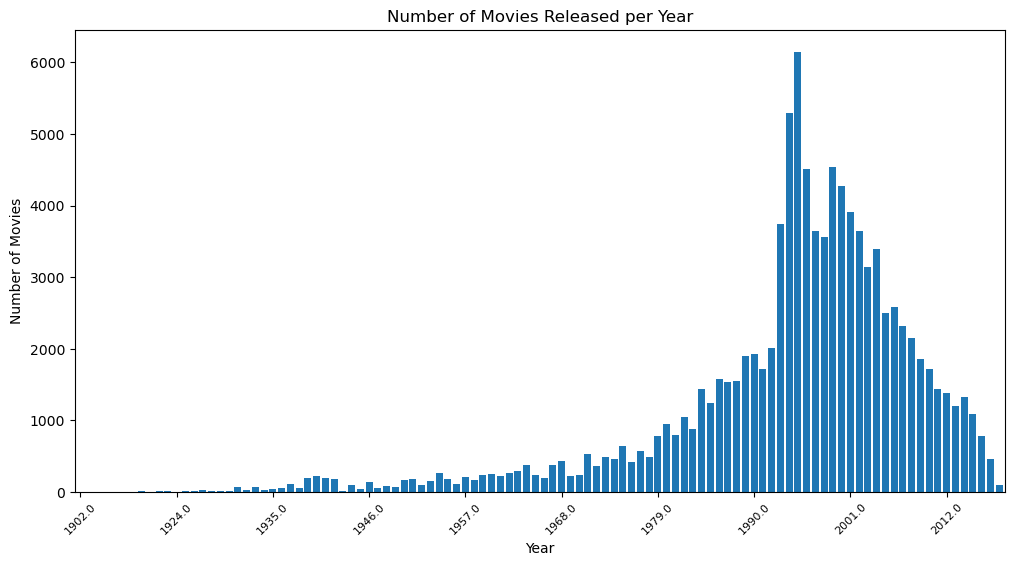

In [28]:
# Extracting the release year from the 'title' column using a regular expression
df['release_year'] = df['title'].str.extract(r'\((\d{4})\)').astype(float)
movies_per_year = df['release_year'].value_counts().sort_index()

# Plotting the number of movies released per year as a bar chart
plt.figure(figsize=(12, 6))  
movies_per_year.plot(kind='bar', width=0.8) 
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')


plt.xticks(rotation=45, fontsize=8)
plt.locator_params(axis='x', nbins=10)

plt.show()


# svd and knn #

#### Preparing Data for Collaborative Filtering with Surprise

This section demonstrates how to prepare a dataset for collaborative filtering using the **Surprise** library.

1. Import Required Libraries.
The Surprise library is used for building, training, and evaluating recommendation 

2. Prepare the Data
- Filter Relevant Columns
Extract the necessary columns from the DataFrame df:
- Define the Rating Scale
In this case, ratings range from 0.5 to 5.0.
- Load Data into Surprise
Load the filtered data into the Surprise Dataset object to prepare it for modeling.
3. Step 3: Split the Dataset
Split the dataset into training and testing sets:

- Training Set: Used to train the recommendation models.
- Testing Set: Used to evaluate the models' performance.
- The split is performed with an 80-20 ratio, and a fixed random seed (random_state=42) ensures reproducibility.
4.  Initialize Recommendation Models
Two collaborative filtering models are initialized:

- SVD (Singular Value Decomposition): A matrix factorization technique.
- KNN (K-Nearest Neighbors): A memory-based approach for finding similar users or items.
5. Train the Models
6. Make Predictions.
7. Evaluate the Models
Evaluate the models' performance using RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error).

In [29]:
# Filter relevant columns for collaborative filtering
ratings_data = df[['userId', 'movieId', 'rating']]

# Define the rating scale for the Surprise library
reader = Reader(rating_scale=(0.5, 5.0))

# Load data into the Surprise library
dataset = Dataset.load_from_df(ratings_data, reader)

In [30]:
# Split the dataset into training and testing sets
trainset, testset = train_test_split(dataset,test_size=0.2,random_state=42)


In [31]:
# Initialize SVD model
svd_model = SVD()

# Initialize KNN model
knn_model = KNNBasic()



In [32]:
# Train models
svd_model.fit(trainset)
knn_model.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [33]:
# Make predictions
svd_predictions = svd_model.test(testset)
knn_predictions = knn_model.test(testset)

In [35]:
# Store results in variables
print("svd metrics")
svd_rmse = accuracy.rmse(svd_predictions)
svd_mae = accuracy.mae(svd_predictions)

print("knn metrics")
knn_rmse = accuracy.rmse(knn_predictions)
knn_mae = accuracy.mae(knn_predictions)



svd metrics
RMSE: 0.8708
MAE:  0.6688
knn metrics
RMSE: 0.9414
MAE:  0.7193


SVD Model:
- RMSE: 0.8688
  - Indicates that the average error between the predicted and actual ratings is approximately 0.87 on a scale of 0.5 to 5.0.
- MAE: 0.6681
  - Shows that the mean absolute difference between predicted and actual ratings is around 0.67.
KNN Model:
- RMSE: 0.9414
  - Suggests an average error of about 0.94 in predicted ratings.
- MAE: 0.7193
  - Indicates a mean absolute error of approximately 0.72.
Insights:
1. SVD Outperforms KNN:
- The SVD model has lower RMSE and MAE values, suggesting it provides more accurate predictions compared to the KNN model.
2. Error Margins:
- Both models achieve relatively small error margins, demonstrating their ability to predict user ratings reasonably well.


In [36]:
# print svd_rmse
print(svd_rmse)


0.8707889316359083


This result indicates that the SVD model has an RMSE of approximately 0.869, meaning the average difference between predicted and actual ratings is around 0.87.

In [37]:
# print knn_rmse
print(knn_rmse)

0.9413500296971693


This result shows that the KNN model has an RMSE of about 0.941, suggesting a slightly higher average error compared to the SVD model.

- The SVD model has a lower RMSE, indicating it provides slightly more accurate predictions than the KNN model in this evaluation.
- Both values represent the models' average prediction error on a scale from 0.5 to 5.0.

## svd

In [38]:
# Define a dictionary of hyperparameters and their possible values for grid search
param_grid = {
    'n_factors': [50, 100],
    'lr_all': [0.005, 0.01],
    'reg_all': [0.02, 0.05],
    'n_epochs': [10, 20, 30]  
}

In [40]:
# # Perform grid search
# grid_search = GridSearchCV(SVD, param_grid=param_grid, cv=3)

# grid_search.fit(dataset)


In [41]:
# # Get the best score and parameters
# print("Best RMSE score:", grid_search.best_score['rmse'])
# print("Best parameters:", grid_search.best_params['rmse'])

- This result shows that the best RMSE score achieved through the grid search is approximately 0.867. A lower RMSE indicates better performance in terms of prediction accuracy
- These are the best hyperparameters found by the grid search:
  - n_factors: 100 — The number of latent factors for matrix factorization.
  - lr_all: 0.01 — The learning rate for all parameters.
  - reg_all: 0.05 — The regularization strength for all parameters.
  - n_epochs: 30 — The number of epochs for training the model.

- The grid search has identified the optimal hyperparameters for the SVD model, which led to the best RMSE score of 0.867.
- Tuning these parameters has significantly improved the model's performance in predicting ratings.

In [42]:
# Create an instance of the SVD model with hyperparameters:
svd_final = SVD(n_factors= 100, reg_all= 0.05, n_epochs= 30, lr_all= 0.01)

# Fit the model to the training dataset (trainset)
svd_final.fit(trainset)

In [43]:
# Define the parameter grid for KNNBasic
param_grid_knn_basic = {"k": list(range(5, 100, 5))}


In [44]:
# # Initialize the GridSearchCV with KNNBasic and the parameter grid
# grid_search_knn_basic = GridSearchCV(KNNBasic, param_grid_knn_basic, measures=['rmse'], cv=10)
# # Load your dataset (assuming 'data' is already prepared as a Surprise Dataset object)
# grid_search_knn_basic.fit(dataset)


In [45]:
# # Check the best parameters and best RMSE
# print("Best parameters found:", grid_search_knn_basic.best_params)
# print("Best RMSE:", grid_search_knn_basic.best_score)

- The best parameter found for the KNN model is k = 15, meaning that the number of neighbors considered in the KNN algorithm is 15.
- The best RMSE achieved during the grid search is approximately 0.931, indicating the average error between predicted and actual ratings.

- The grid search process has found the optimal KNN model hyperparameter (k=15), leading to the best RMSE of approximately 0.931.
- The result suggests that the KNN model performs reasonably well, but further adjustments may still improve its performance.

In [47]:
# Define the methods and user_base values for testing
#methods = ["cosine", "pearson", "pearson_baseline", "msd"]
#user_base = [False, True]

# Iterate over different similarity methods and user-based filtering options
#for m in methods:
    #for u in user_base:
        # Perform cross-validation with KNNBasic and the current configuration
        #knn_basic = cross_validate(KNNBasic(k=30, sim_options={"name": m, "user_based": u}, verbose=False), dataset, cv=5)
        
        # Calculate and print the mean RMSE
       # rmse_mean = np.mean(knn_basic["test_rmse"])
        #print(f"The mean RMSE of the KNNBasic model with {m} similarity and user-based {u} is {rmse_mean}")

we will use the peason baseline similarity for the item based(user based false)..which is the best performing at  0.9180227395332414

In [48]:
# Initialize the KNNBasic model with the desired configuration
knn_basic_final = KNNBasic(k=15, sim_options={"name": "pearson_baseline", "user_based": False})

# Fit the model to the dataset
knn_basic_final.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [49]:
# Filter the DataFrame 'df' for rows where 'userId' is equal to 1 and 'movieId' is equal to 1
df[(df['userId'] == 1) & (df['movieId'] == 1)][['userId', 'movieId', 'rating', 'title']]

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)


This code filters the DataFrame df to find the row where the userId is 1 and the movieId is 1, and it displays specific columns (userId, movieId, rating, and title) for that entry.

In [50]:
# Make a prediction for a specific user and movie
prediction = knn_basic_final.predict(uid=1, iid=1)

# Extract the movie title for movieId 47
movie_title = df.loc[df['movieId'] == 1, 'title'].iloc[0]

# Display the prediction
print(f"Predicted rating for user 1 on '{movie_title}' is: {prediction.est:.2f}")

Predicted rating for user 1 on 'Toy Story (1995)' is: 4.25


The model predicts a rating of 4.25 for user 1 on "Toy Story (1995)" based on the collaborative filtering method (KNN model).

In [51]:
# Predict the rating for user 1 on movie 1 using SVD
predictionsvd = svd_final.predict(uid=1, iid=1)

# Display the prediction
print(f"Predicted rating for user 1 on '{movie_title}' is: {predictionsvd.est:.2f}")

Predicted rating for user 1 on 'Toy Story (1995)' is: 4.27


The model predicts a slightly higher rating of 4.39 for user 1 on "Toy Story (1995)" compared to the KNN model (which predicted 4.25

In [52]:
# Define a function to get top movie recommendations for a given user
def get_top_recommendations(user_id, svd_model, movies_df, ratings_df, top_n=5):

    # Getting all movies the user has already rated, then getting all movies and movies that haven't been rated by the user
    user_rated_movies = ratings_df[ratings_df['userId'] == user_id]['movieId'].unique()
    all_movies = movies_df['movieId'].unique()
    unrated_movies = [movie for movie in all_movies if movie not in user_rated_movies]

    # Predicting ratings for unrated movies
    predictions = []
    for movie_id in unrated_movies:
        pred = svd_model.predict(uid=user_id, iid=movie_id)
        predictions.append((movie_id, pred.est))  
        
    # Sorting predictions by rating in descending order
    # top-n movie IDs
    top_movies = sorted(predictions, key=lambda x: x[1], reverse=True)[:top_n]

    
    # getting movie details
    recommended_movies = movies_df[movies_df['movieId'].isin([movie[0] for movie in top_movies])]

    recommended_movies['predicted_rating'] = [movie[1] for movie in top_movies]

    # Return the recommendations as a DataFrame
    return recommended_movies[['title', 'genres', 'predicted_rating']].sort_values(by='predicted_rating', ascending=False)

In [53]:
#  generating recommendations
user_id = 1
top_n = 5

# Get the top recommendations
recommendations = get_top_recommendations(user_id, svd_model, movies_df, ratings_df, top_n=top_n)

# Print the recommendations
print(f"Top {top_n} recommendations for user {user_id}:\n")
for idx, row in recommendations.iterrows():
    print(f"- {row['title']} ({row['genres']}) with a predicted rating of {row['predicted_rating']:.2f}")


Top 5 recommendations for user 1:

- Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) (Comedy|War) with a predicted rating of 5.00
- African Queen, The (1951) (Adventure|Comedy|Romance|War) with a predicted rating of 5.00
- Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966) (Action|Adventure|Western) with a predicted rating of 5.00
- Lawrence of Arabia (1962) (Adventure|Drama|War) with a predicted rating of 5.00
- Boot, Das (Boat, The) (1981) (Action|Drama|War) with a predicted rating of 5.00


<ipython-input-52-50a0b1eef89a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_movies['predicted_rating'] = [movie[1] for movie in top_movies]


- Top Recommendations: The top 5 recommendations for user 1 are all highly-rated movies, with a predicted rating of 5.00 for each. These recommendations span across various genres, including Crime, Drama, Comedy, Mystery, and more.
- The system successfully generates movie recommendations based on collaborative filtering using the SVD model and provides the predicted ratings for each recommended movie.

## content based

In [54]:
# Import the TfidfVectorizer class from sklearn.feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer

# Import cosine_similarity function from sklearn.metrics.pairwise
from sklearn.metrics.pairwise import cosine_similarity

In [55]:
# Preprocesing the genres column
movies_df['genres'] = movies_df['genres'].str.replace("|"," ")
movies_df.head()
# creating a matrix
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(movies_df['genres'])

In [56]:
# Get the dimensions of the tfidf_matrix
tfidf_matrix.shape

(9742, 23)

In [57]:
#Computing the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(9742, 9742)

In [58]:
def recommend_movies(movie_title, df=movies_df, cosine_sim=cosine_sim, top_n=5):
    """
    Recommend movies based on the given movie title.
    
    Parameters:
        movie_title (str): Title (or part of title) of the movie to base recommendations on.
        df (pd.DataFrame): The movies DataFrame containing 'title' and 'genres'.
        cosine_sim (ndarray): Precomputed cosine similarity matrix.
        top_n (int): Number of recommendations to return.
    
    Returns:
        pd.DataFrame: DataFrame with titles and genres of recommended movies.
    """

    # Search for movies in the DataFrame where the 'title' contains the input movie_title
    matches = df[df['title'].str.contains(movie_title, case=False)]
    
    if matches.empty:
        return f"Movie '{movie_title}' not found in the dataset."
    
     # Get the index of the first matching movie
    idx = matches.index[0]  

    # Get the cosine similarity scores between the input movie (idx) and all other movies
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the similarity scores in descending order, so the most similar movies come first
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top-n movies
    sim_scores = sim_scores[1:top_n + 1]  
    movie_indices = [i[0] for i in sim_scores]

   # Fetch the titles and genres of the recommended movies based on the indices
    top_movies = df.iloc[movie_indices][['title', 'genres']].reset_index(drop=True)
     # Reset the index of the result so that the top recommendation starts from index 1
    top_movies.index = range(1, top_n + 1)  
    
    return top_movies

In [59]:
# print recommend_movies
print(recommend_movies("Eva"))

                                           title                   genres
1  Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)  Drama Film-Noir Romance
2                          Mildred Pierce (1945)          Drama Film-Noir
3       Strange Love of Martha Ivers, The (1946)          Drama Film-Noir
4                  Sweet Smell of Success (1957)          Drama Film-Noir
5                   Harder They Fall, The (1956)          Drama Film-Noir


In [60]:
def hybrid_recommendations(user_id, movie_title, svd_model, movies_df, ratings_df, cosine_sim, top_n=5):
    """
    Generate hybrid movie recommendations using SVD (collaborative filtering) 
    and cosine similarity (content-based filtering).
    
    Parameters:
        user_id (int): The ID of the user.
        movie_title (str): Title (or part of title) of the movie for content-based recommendations.
        svd_model: Trained SVD model for collaborative filtering.
        movies_df (pd.DataFrame): DataFrame with movie details (movieId, title, genres).
        ratings_df (pd.DataFrame): DataFrame with user ratings (userId, movieId, rating).
        cosine_sim (ndarray): Precomputed cosine similarity matrix for content-based filtering.
        top_n (int): Number of recommendations to return from each method.
    
    Returns:
        pd.DataFrame: DataFrame with combined hybrid recommendations.
    """
   # Collaborative Filtering Recommendations
    cf_recommendations = pd.DataFrame()
    if user_id and user_id in ratings_df['userId'].unique():
        cf_recommendations = get_top_recommendations(user_id, svd_model, movies_df, ratings_df, top_n)
        cf_recommendations['source'] = 'Collaborative Filtering'
    else:
        # Handling cold-start
        cf_recommendations = pd.DataFrame(columns=['title', 'genres', 'predicted_rating', 'source'])

    #  Content-Based Recommendations
    cb_recommendations = recommend_movies(movie_title, df=movies_df, cosine_sim=cosine_sim, top_n=top_n)
    if isinstance(cb_recommendations, str):  # Handle case when movie_title is not found
        cb_recommendations = pd.DataFrame(columns=['title', 'genres', 'source', 'predicted_rating'])
    else:
        cb_recommendations['source'] = 'Content-Based Filtering'
        cb_recommendations['predicted_rating'] = None  # No predicted rating for content-based

    # Combining Both Recommendations
    combined_recommendations = pd.concat(
        [cf_recommendations, cb_recommendations],
        ignore_index=True
    ).drop_duplicates(subset='title') 

    # Sorting Combined Recommendations
    combined_recommendations['predicted_rating'] = combined_recommendations['predicted_rating'].fillna(0)
    combined_recommendations = combined_recommendations.sort_values(
        by='predicted_rating', ascending=False, na_position='last'
    )

    combined_recommendations.index = range(1, len(combined_recommendations) + 1)

    return combined_recommendations[['title', 'genres', 'predicted_rating', 'source']]

In [61]:
#  hybrid_recommendations function
user_id = 1  # Example user ID
movie_title = "Inception"  # Example movie title
top_n = 5  # Number of recommendations to generate

# Generate hybrid recommendations
recommendations = hybrid_recommendations(
    user_id=user_id,
    movie_title=movie_title,
    svd_model=svd_model,
    movies_df=movies_df,
    ratings_df=ratings_df,
    cosine_sim=cosine_sim,
    top_n=top_n
)


# Display only the top 5 recommendations
top_5_recommendations = recommendations.head(5)

print(f"Top 5 hybrid recommendations for User {user_id} based on the movie '{movie_title}':\n")
for index, row in top_5_recommendations.iterrows():
    print(f"{index}. {row['title']} (Predicted Rating: {row['predicted_rating']:.2f})")



Top 5 hybrid recommendations for User 1 based on the movie 'Inception':

1. Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) (Predicted Rating: 5.00)
2. African Queen, The (1951) (Predicted Rating: 5.00)
3. Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966) (Predicted Rating: 5.00)
4. Lawrence of Arabia (1962) (Predicted Rating: 5.00)
5. Boot, Das (Boat, The) (1981) (Predicted Rating: 5.00)


<ipython-input-52-50a0b1eef89a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_movies['predicted_rating'] = [movie[1] for movie in top_movies]


- Top Recommendations: The top 5 hybrid recommendations for user 1 based on "Inception" have all been predicted with a rating of 5.00. These recommendations are diverse, spanning across genres like Crime, Drama, Comedy, Mystery, and more.
- The hybrid recommendation system successfully combines both collaborative filtering and content-based filtering techniques, generating top 5 movie recommendations for the user with predicted ratings.

In [62]:
# saving the models using joblib and cleaned dataset
movies_df.to_csv('movies_df.csv', index=False)

# Save the content similarity matrix
joblib.dump(cosine_sim, 'content_similarity.pkl')

# Save the collaborative similarity matrix
joblib.dump(svd_final, 'collaborative_similarity.pkl')

['collaborative_similarity.pkl']